In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Audio

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/dogbreeds/'
sz = 256
bs = 15

In [4]:
ls {PATH}

labels.csv  probs.pkl  sample_submission.csv  subm/  test/  tmp/  train/


In [5]:
from fastai.plots import *

In [6]:
f_model = resnext101_64
arch = f_model

In [7]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test', num_workers=4,
                                       val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [9]:
data = get_data(sz,bs)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [10]:
data = data.resize(int(sz*1.3), 'tmp')
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [11]:
learn = ConvLearner.pretrained(f_model, data, precompute = True)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 425/546 [00:04<00:01, 95.41it/s, loss=7.8] 


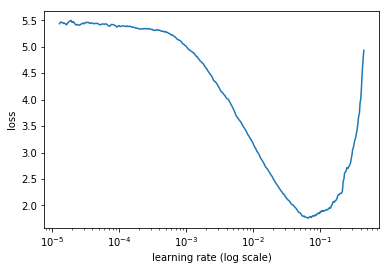

In [12]:
lrf=learn.lr_find()
learn.sched.plot()
Audio(url="CHORD.WAV", autoplay=True)

In [13]:
lr = 0.008

In [14]:
learn.fit(lr, 1)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.589708   0.304897   0.910462  



In [15]:
learn.precompute = False

In [16]:
learn.fit(lr, 2, cycle_len=1)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.425189   0.259154   0.916302  
    1      0.382449   0.245789   0.921655                    



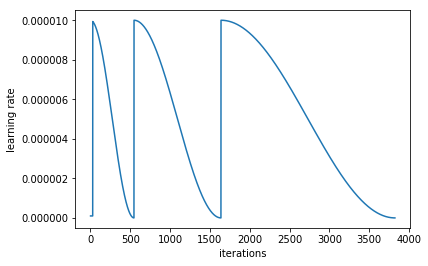

In [22]:
learn.sched.plot_lr()

In [18]:
learn.unfreeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 48%|████▊     | 261/546 [02:38<02:53,  1.65it/s, loss=2.04] 

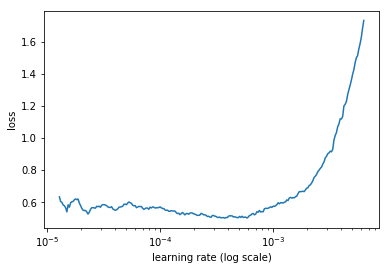

In [19]:
lrf=learn.lr_find()
learn.sched.plot()
Audio(url="CHORD.WAV", autoplay=True)

In [39]:
learn.save("tmp")

In [ ]:
learn.load("tmp")

In [20]:
lr=np.array([1e-4, 5e-5, 1e-5])

In [21]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
Audio(url="CHORD.WAV", autoplay=True)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  1%|▏         | 7/546 [00:04<05:48,  1.55it/s, loss=0.437] 


Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                    
    0      0.509035   0.275615   0.913382  
    1      0.491482   0.247464   0.922141                    
    2      0.445555   0.254683   0.919221                    
    3      0.536047   0.263791   0.916302                    
    4      0.401694   0.256385   0.917275                    
    5      0.397799   0.242662   0.917275                    
    6      0.365827   0.256742   0.919708                    



In [42]:
learn.save("tmp2")

In [43]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [23]:
#See: http://forums.fast.ai/uploads/default/original/2X/8/89db4b136ff2824d4580924974d4a83a774f1dad.png
log_probs = learn.predict()
probs = np.exp(log_probs); print(probs.shape)
preds = np.argmax(probs, axis=1); print(preds.shape)
Audio(url="CHORD.WAV", autoplay=True)

(2044, 120)
(2044,)


In [25]:
log_probs_tta, y = learn.TTA(is_test = True)
print(log_probs_tta.shape)

probs_tta = np.mean(np.exp(log_probs_tta), 0); print(probs_tta.shape)
preds_tta = np.argmax(probs_tta, axis=1); print(preds_tta.shape)
Audio(url="CHORD.WAV", autoplay=True)

(5, 10357, 120)                               
(10357, 120)
(10357,)


In [26]:
ds = pd.DataFrame(probs_tta) #Take the 1st one out of the 5
ds.columns = data.classes
ds.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
ds.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)
FileLink(f'{SUBM}subm.gz')

/home/paperspace/fastai/courses/dl1/data/dogbreeds/subm/subm.gz